# Pymaceuticals Inc.
---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview

mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

number_mice=len(mouse_study_df["Mouse ID"].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Step 1: Identify all duplicates
duplicates = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Step 2: Get the unique Mouse IDs of the duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mice_rows = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mouse_ids)]
print(duplicate_mice_rows)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study_df = mouse_study_df[~mouse_study_df['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_mouse_study_df["Mouse ID"].unique())
cleaned_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#Used the agg method seen below

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = cleaned_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('SEM', 'sem')
])
# Step 2: Round the results to 2 decimal places for readability
summary_stats = summary_stats.round(2)

# Step 3: Display the summary statistics table
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

C:\Users\Rachel\AppData\Local\Temp\ipykernel_6712\327895203.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


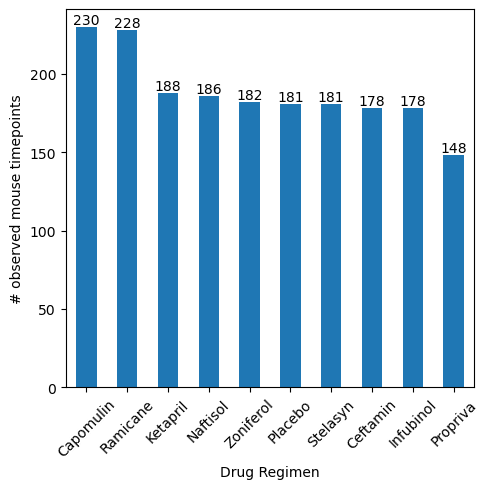

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by drug regimen and count rows
drug_counts = cleaned_mouse_study_df.groupby('Drug Regimen').size().sort_values(ascending=False)

# Create a bar plot using pandas
ax = drug_counts.plot(kind='bar', figsize=(5, 5), rot=90)

# Customize the plot
ax.set_xlabel('Drug Regimen', fontsize=10)
ax.set_ylabel('# observed mouse timepoints', fontsize=10)
ax.tick_params(axis='x', rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(drug_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout
fig = ax.get_figure()
fig.tight_layout()

# Display the plot
fig.show()

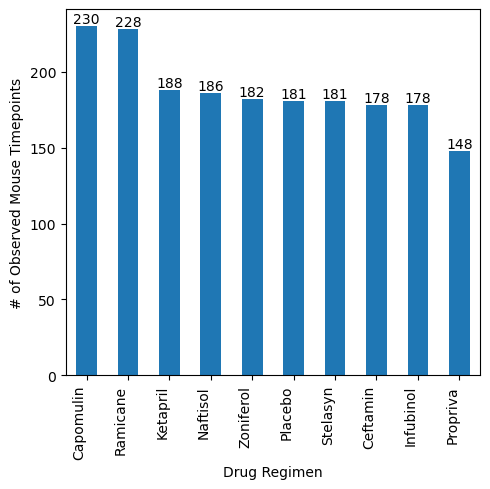

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create a bar plot
plt.figure(figsize=(5, 5))
drug_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Drug Regimen', fontsize=10)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=10)
plt.xticks(rotation=90, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(drug_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

C:\Users\Rachel\AppData\Local\Temp\ipykernel_6712\3064943981.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


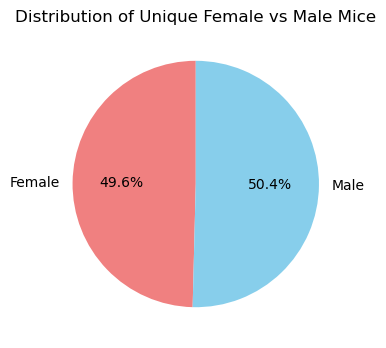

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Group by gender and count unique Mouse IDs
gender_counts = cleaned_mouse_study_df.groupby('Sex')['Mouse ID'].nunique()

# Create a pie chart using pandas
ax = gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(4, 4),
    colors=['lightcoral', 'skyblue'],
    title='Distribution of Unique Female vs Male Mice'
)

# Customize the plot
ax.set_ylabel('')  # Remove the y-label for a cleaner look

# Display the plot
fig = ax.get_figure()
fig.show()


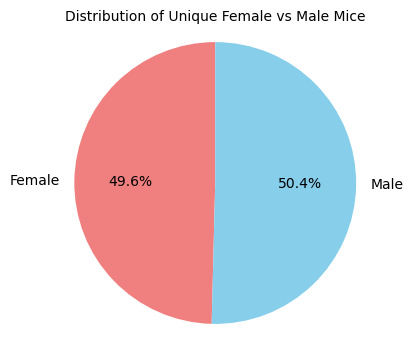

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

#Group by sex and count unique Mouse IDs
gender_counts = cleaned_mouse_study_df.groupby('Sex')['Mouse ID'].nunique()

# Prepare data for the pie chart
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightcoral', 'skyblue']

# Create the pie chart
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Customize the plot
ax.set_title('Distribution of Unique Female vs Male Mice', fontsize=10)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Convert to Date Time
cleaned_mouse_study_df.loc[:, 'Timepoint'] = pd.to_datetime(cleaned_mouse_study_df['Timepoint'])

# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = cleaned_mouse_study_df.groupby('Drug Regimen')['Timepoint'].max().reset_index()

# Merge to get tumor volume at the last timepoint
last_timepoint_data = pd.merge(max_timepoints, cleaned_mouse_study_df, on=['Drug Regimen', 'Timepoint'], how='left')

drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
top_four_data = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(drug_regimens)]
top_four_data 

C:\Users\Rachel\AppData\Local\Temp\ipykernel_6712\3093969623.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
[          '1970-01-01 00:00:00', '1970-01-01 00:00:00.000000005',
 '1970-01-01 00:00:00.000000010', '1970-01-01 00:00:00.000000015',
 '1970-01-01 00:00:00.000000020', '1970-01-01 00:00:00.000000025',
 '1970-01-01 00:00:00.000000030', '1970-01-01 00:00:00.000000035',
 '1970-01-01 00:00:00.000000040', '1970-01-01 00:00:00.000000045',
 ...
           '1970-01-01 00:00:00', '1970-01-01 00:00:00.000000005',
 '1970-01-01 00:00:00.000000010', '1970-01-01 00:00:00.000000015',
 '1970-01-01 00:00:00.000000020', '1970-01-01 00:00:00.000000025',
 '1970-01-01 00:00:00.000000030', '1970-01-01 00:00:00.000000035',
 '1970-01-01 00:00:00.000000040', '1970-01-01 00:00:00.000000045']
Length: 1880, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


,Drug Regimen,Timepoint,Mouse ID,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,1970-01-01 00:00:00.000000045,s185,Female,3,17,23.343598,1
1,Capomulin,1970-01-01 00:00:00.000000045,x401,Female,16,15,28.484033,0
2,Capomulin,1970-01-01 00:00:00.000000045,m601,Male,22,17,28.430964,1
3,Capomulin,1970-01-01 00:00:00.000000045,u364,Male,18,17,31.023923,3
4,Capomulin,1970-01-01 00:00:00.000000045,y793,Male,17,17,31.896238,2
...,...,...,...,...,...,...,...,...
100,Ramicane,1970-01-01 00:00:00.000000045,a411,Male,3,22,38.407618,1
101,Ramicane,1970-01-01 00:00:00.000000045,e662,Male,8,24,40.659006,2
102,Ramicane,1970-01-01 00:00:00.000000045,u196,Male,18,25,40.667713,3
103,Ramicane,1970-01-01 00:00:00.000000045,q597,Male,20,25,45.220869,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Extract unique treatments top_four_data to create list
treatments = top_four_data['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Initialize a list to hold outlier information
outlier_info = []

# Loop through each treatment to calculate IQR and identify outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = last_timepoint_data[last_timepoint_data['Drug Regimen'] == treatment]

# Add the tumor volumes to the list for plotting
    tumor_volumes.extend(treatment_data['Tumor Volume (mm3)'].tolist())
# Calculate Q1, Q3, and IQR
    Q1 = treatment_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = treatment_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1   
 # Determine the bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                              (treatment_data['Tumor Volume (mm3)'] > upper_bound)]

 # Store the outlier information
    outlier_info.append({
        'Drug Regimen': treatment,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers[['Mouse ID', 'Tumor Volume (mm3)']]
    })
# Display the outlier information
for info in outlier_info:
    print(f"Drug Regimen: {info['Drug Regimen']}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    if not info['Outliers'].empty:
        print("Potential Outliers:")
        print(info['Outliers'])
    else:
        print("No potential outliers.")
    print("\n")

Drug Regimen: Capomulin
Q1: 32.37735684, Q3: 40.1592203, IQR: 7.781863460000004
Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
No potential outliers.


Drug Regimen: Ceftamin
Q1: 61.43389223, Q3: 67.52748237, IQR: 6.093590140000003
Lower Bound: 52.29350701999999, Upper Bound: 76.66786758
No potential outliers.


Drug Regimen: Infubinol
Q1: 62.75445141, Q3: 67.68556862, IQR: 4.9311172099999965
Lower Bound: 55.35777559500001, Upper Bound: 75.08224443499999
No potential outliers.


Drug Regimen: Ramicane
Q1: 30.981175225, Q3: 38.5083053075, IQR: 7.527130082500001
Lower Bound: 19.69048010125, Upper Bound: 49.79900043125001
No potential outliers.




<Figure size 1000x600 with 0 Axes>

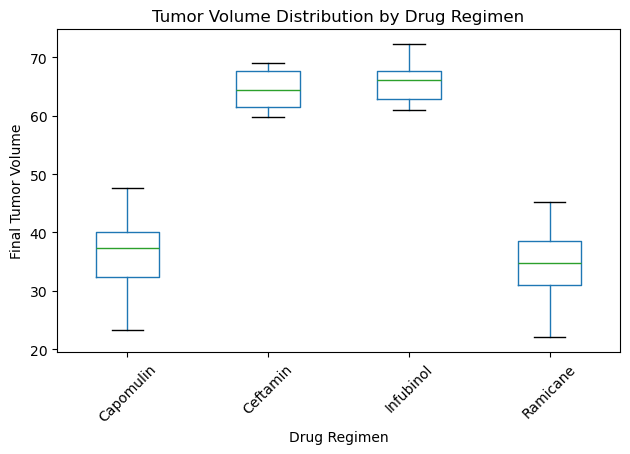

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

#  Generate the box plot
plt.figure(figsize=(10, 6))
top_four_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

# Customize the plot
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Line and Scatter Plots

C:\Users\Rachel\AppData\Local\Temp\ipykernel_6712\3522408433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_u364['Timepoint_numeric'] = pd.to_numeric(mouse_u364['Timepoint'])


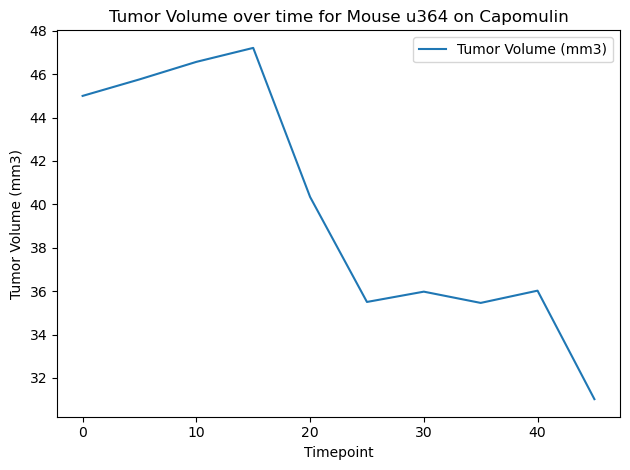

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_u364 = cleaned_mouse_study_df[cleaned_mouse_study_df['Mouse ID'] == 'u364']

# Convert 'Timepoint' to numeric values for plotting
mouse_u364['Timepoint_numeric'] = pd.to_numeric(mouse_u364['Timepoint'])

# Create the plot
mouse_u364.plot(x='Timepoint_numeric', y='Tumor Volume (mm3)')

# Customize the plot
plt.title('Tumor Volume over time for Mouse u364 on Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

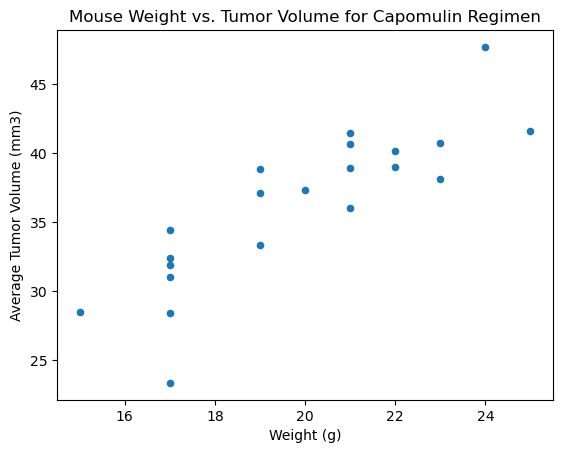

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = top_four_data[top_four_data['Drug Regimen'] == 'Capomulin']
capomulin.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')

plt.title('Mouse Weight vs. Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.85


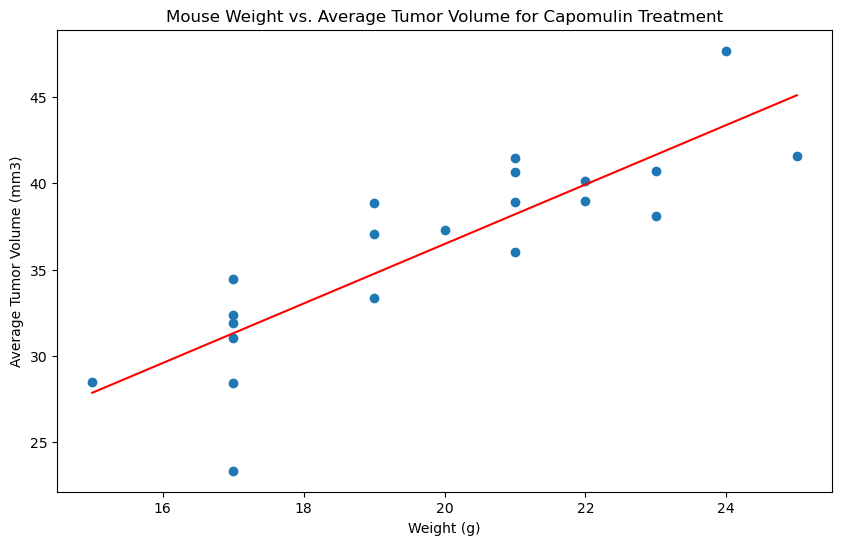

In [50]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin = top_four_data[top_four_data['Drug Regimen'] == 'Capomulin']

# Extract x and y values
x = capomulin['Weight (g)'].values
y = capomulin['Tumor Volume (mm3)'].values

# Calculate correlation coefficient
correlation_coef = np.corrcoef(x, y)[0, 1]

print(f"The correlation between mouse weight and average tumor volume is {correlation_coef:.2f}")

# Calculate linear regression
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

slope = numerator / denominator
intercept = y_mean - (slope * x_mean)

# Calculate R-squared
y_pred = slope * x + intercept
ss_tot = np.sum((y - y_mean)**2)
ss_res = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_res / ss_tot)

# Generate points for regression line
x_line = np.array([min(x), max(x)])
y_line = slope * x_line + intercept

# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.plot(x_line, y_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')

plt.show()